In [173]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Datos
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(6)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718


In [175]:
# mostrando el numero de datos y variables
datos.shape

(30, 3)

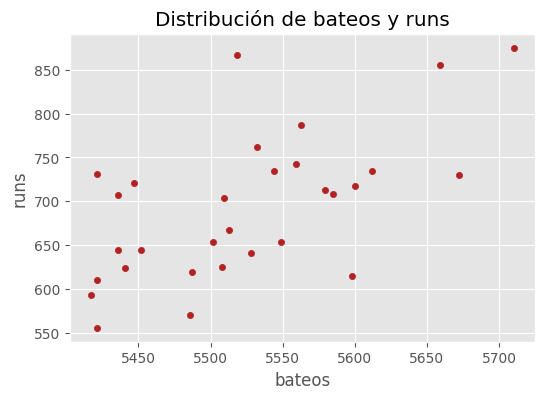

In [176]:
# Gráfico de dispersion
fig, ax = plt.subplots(figsize=(6, 4))
datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [177]:
# Ahora veamos algunas estadísticas de nuestros datos
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


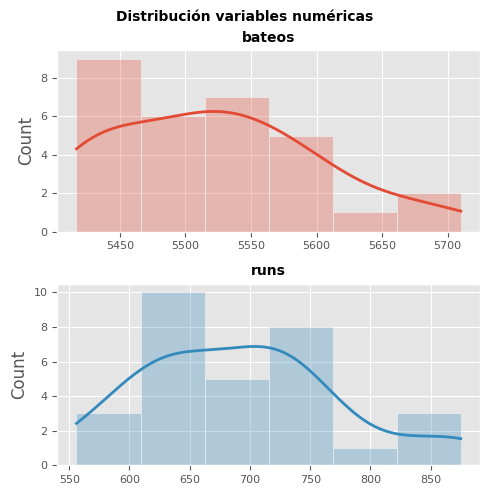

In [178]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [179]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791978


In [180]:
# División de los datos en train y test
X = datos[['bateos']]
y = datos['runs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

No es necesario hacer escalado ya que tenemos una sola variable independiente

In [181]:
# Creación del modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [182]:
# Información del modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


In [183]:
# Error de test del modelo
predicciones = modelo.predict(X = X_test)
print(predicciones[0:5,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]
 [789.19258689]
 [627.20128033]]

El error (rmse) de test es: 59.336716083360486


In [184]:
print ("precision:", modelo.score (X_train, y_train))

precision: 0.27130364535823914


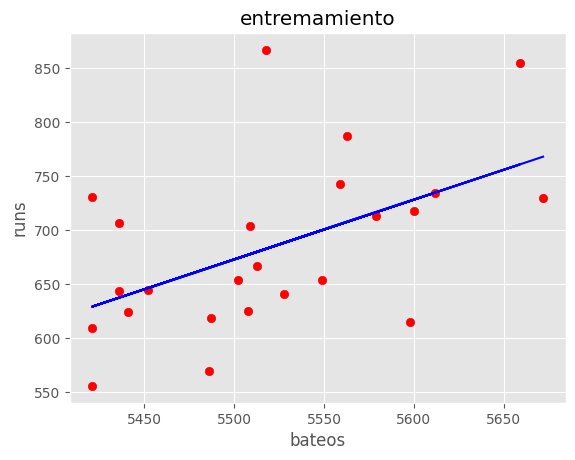

In [185]:
# visualizando los resultados train
plt.scatter(X_train, y_train, color= "red")
plt.plot(X_train,modelo.predict(X_train),color="blue")
plt.title("entremamiento")
plt.xlabel("bateos")
plt.ylabel("runs")
plt.show()

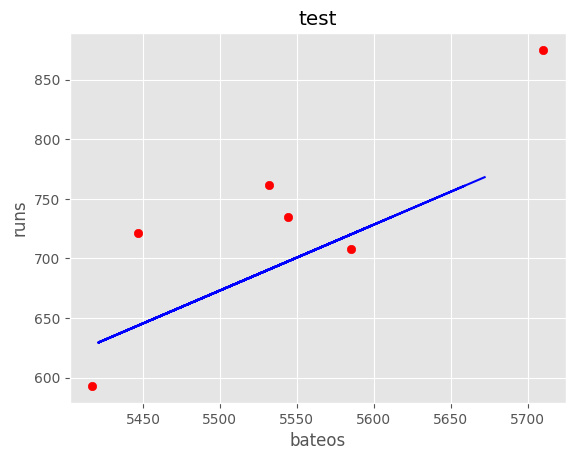

In [186]:
# visualizando los resultados test
plt.scatter(X_test, y_test, color= "red")
plt.plot(X_train,modelo.predict(X_train),color="blue")
plt.title("test")
plt.xlabel("bateos")
plt.ylabel("runs")
plt.show()

**Con la libreria Statmodels**

In [187]:
# con Statsmodels
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [188]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 28 Aug 2024   Prob (F-statistic):            0.00906
Time:                        23:38:05   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [189]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

In [190]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


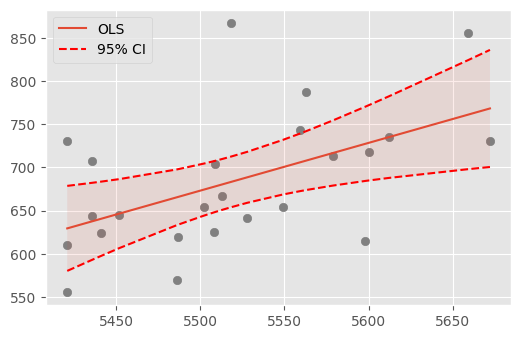

In [191]:
#Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [192]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336119


Diagnóstico de los resíduos

In [193]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

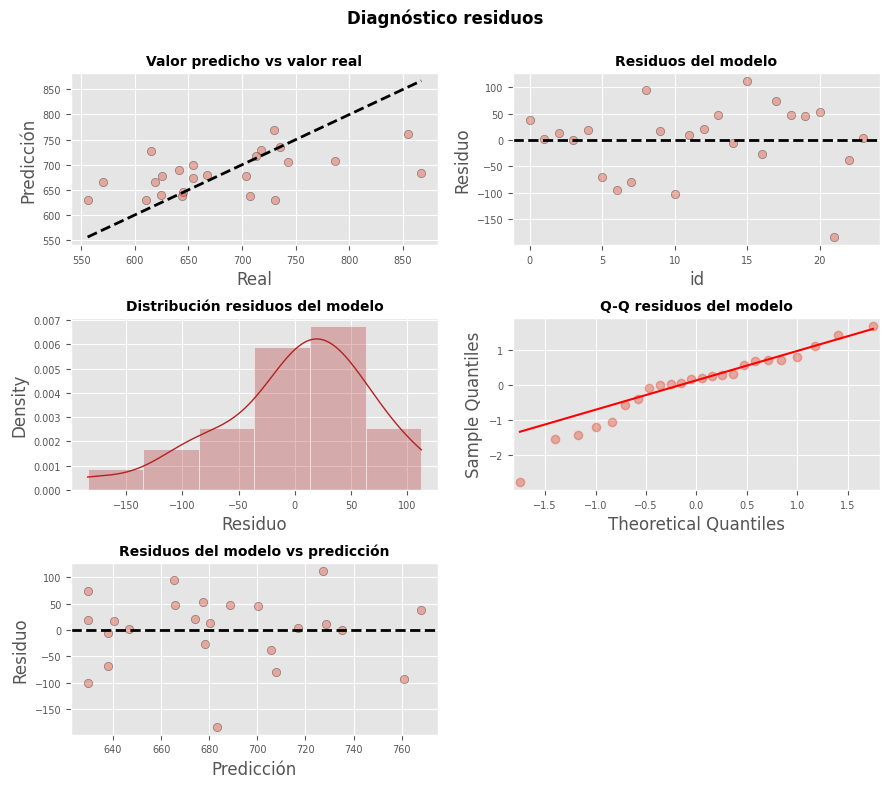

In [194]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Test de normalidad

In [195]:
# Normalidad de los residuos Shapiro-Wilk test
from scipy import stats
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9430998519136188, pvalue=0.19118498783411486)

In [196]:
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 5.033149985304386, p-value = 0.08073565395585461


In [197]:
# Predicciones con intervalo de confianza
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


In [198]:
# Error de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336119


Outliers

In [199]:
datos.shape

(30, 3)

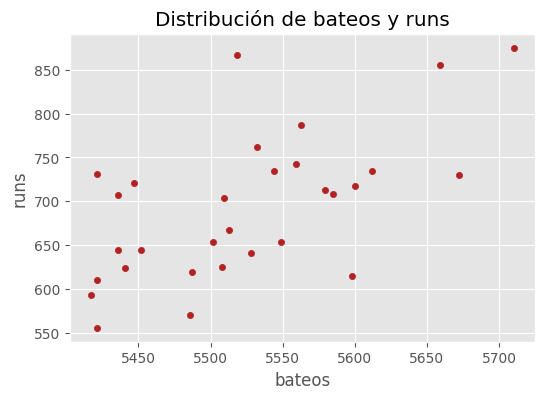

In [200]:
# Gráfico de dispersion
fig, ax = plt.subplots(figsize=(6, 4))
datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

Detectar outliers

In [201]:
toprange = y.mean()+3*y.std()
botrange = y.mean()-3*y.std()
print("toprange", toprange)
print("botprange", botrange)
copydatos = datos.copy()
copydatos = copydatos.drop(copydatos[copydatos["runs"]>toprange].index) # drop elimina los que superan
copydatos = copydatos.drop(copydatos[copydatos["runs"]<botrange].index)
copydatos

toprange 941.0372647763469
botprange 446.16273522365316


,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [202]:
copydatos.shape

(30, 3)

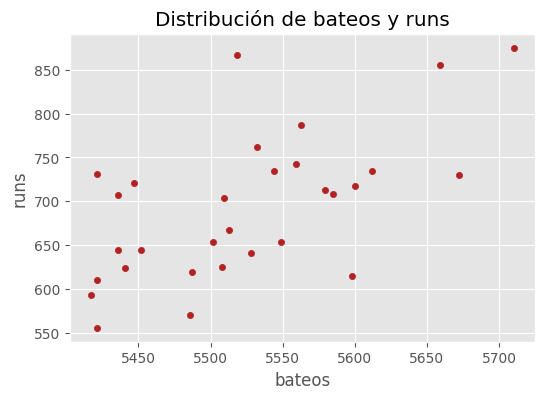

In [203]:
# Gráfico de dispersion nuevo
fig, ax = plt.subplots(figsize=(6, 4))
copydatos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

Metodo rango intercuartil

In [204]:
p25 =y.quantile(0.25)
p75 =y.quantile(0.75)
IQR = p75-p25
lim_sup = p75+1.5*IQR
lim_inf = p75-1.5*IQR

copydatos = datos.copy()
copydatos = copydatos.drop(copydatos[copydatos["runs"]>lim_sup].index) # drop elimina los que superan
copydatos = copydatos.drop(copydatos[copydatos["runs"]<lim_inf].index)
copydatos.shape

(28, 3)

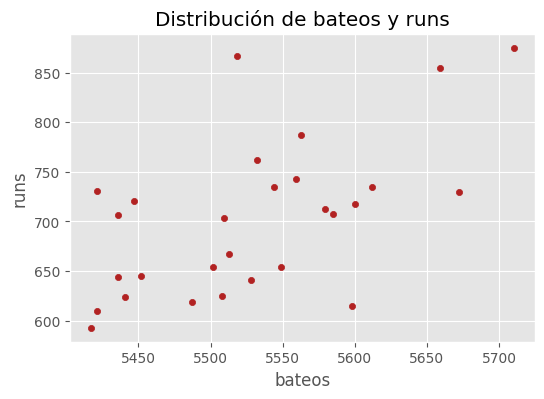

In [205]:
# Gráfico de dispersion nuevo
fig, ax = plt.subplots(figsize=(6, 4))
copydatos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');